In [1]:
#import tools
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [2]:
#read golf csv (with stats from 2010 to 2018)
df = pd.read_csv('PGA_Data_Historical.csv')

In [3]:
#check shape of csv
df.shape

(2740403, 5)

In [4]:
#change csv format from long to wide
df = df.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()





In [5]:
#check new csv shape
df.shape

(11223, 2083)

In [6]:
#show first 50 rows
df.head(50)

Variable     Player Name  Season  \
0         A.J. McInerney    2018   
1         Aaron Baddeley    2010   
2         Aaron Baddeley    2011   
3         Aaron Baddeley    2012   
4         Aaron Baddeley    2013   
5         Aaron Baddeley    2014   
6         Aaron Baddeley    2015   
7         Aaron Baddeley    2016   
8         Aaron Baddeley    2017   
9         Aaron Baddeley    2018   
10        Aaron Goldberg    2010   
11        Aaron Goldberg    2011   
12        Aaron Goldberg    2012   
13        Aaron Goldberg    2013   
14        Aaron Goldberg    2014   
15         Aaron Krueger    2014   
16            Aaron Pike    2015   
17            Aaron Pike    2016   
18             Aaron Rai    2016   
19             Aaron Rai    2017   
20             Aaron Rai    2018   
21        Aaron Townsend    2010   
22        Aaron Townsend    2011   
23        Aaron Townsend    2012   
24        Aaron Townsend    2013   
25        Aaron Townsend    2014   
26        Aaron Townsend    2015   
27         Aaron Watkins    2010   
28         Aaron Watkins    2011   
29         Aaron Watkins    2012   
30         Aaron Watkins    2013   
31         Aaron Watkins    2014   
32         Aaron Watkins    2015   
33            Aaron Wise    2016   
34            Aaron Wise    2017   
35            Aaron Wise    2018   
36         Abraham Ancer    2015   
37         Abraham Ancer    2016   
38         Abraham Ancer    2017   
39         Abraham Ancer    2018   
40            Adam Bland    2010   
41            Adam Bland    2011   
42            Adam Bland    2012   
43            Adam Bland    2013   
44            Adam Bland    2014   
45            Adam Bland    2015   
46            Adam Bland    2016   
47            Adam Bland    2017   
48            Adam Bland    2018   
49            Adam Blyth    2010   

Variable % of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S)  \
0                                                       NaN             
1                                                       NaN             
2                                                         1             
3                                                       NaN             
4                                                       NaN             
5                                                       NaN             
6                                                       NaN             
7                                                       NaN             
8                                                       NaN             
9                                                       NaN             
10                                                      NaN             
11                                                      NaN             
12                                                      NaN             
13                                                      NaN             
14                                                      NaN             
15                                                      NaN             
16                                                      NaN             
17                                                      NaN             
18                                                      NaN             
19                                                      NaN             
20                                                      NaN             
21                                                      NaN             
22                                                      NaN             
23                                                      NaN             
24                                                      NaN             
25                                                      NaN             
26                                                      NaN             
27                                                      NaN             
28                                            

In [8]:
#set options so that df will display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
#drop rows without money earnings since that will not work with testing
df = df.dropna(how='any', subset=['Total Money (Official and Unofficial) - (EVENTS)'])

In [10]:
#check new shape
df.shape

(3681, 2083)

In [11]:
#check for unique player names
df['Player Name'].nunique()

1051

In [12]:
#create new df with only certain columns
df = df[['Player Name', 'Season', '1-Putts per Round - (AVG)', '2-Putts per Round - (AVG)', 'Apex Height - (AVG.)', 'Average Distance of Putts made - (AVG DIST.)', 'Average Distance to Hole After Tee Shot - (AVG)', 'Average Going for it Shot Distance (in Yards) - (AVG)', 'Back 9 Par 3 Scoring Average - (AVG)', 'Back 9 Par 4 Scoring Average - (AVG)', 'Back 9 Par 5 Scoring Average - (AVG)', 'Back 9 Scoring Average - (AVG)','Ball Speed - (AVG.)', 'Ball Striking - (GIR RANK)', 'Birdie Average - (AVG)', 'Birdie or Better Percentage - (%)','Bogey Avoidance - (% MAKES BOGEY)', 'Carry Distance - (AVG.)', 'Bounce Back - (%)', 'Club Head Speed - (AVG.)','Distance from Center of Fairway - (AVG)', 'Driving Accuracy Percentage - (%)', 'Driving Distance - (AVG.)','Fairway Bunker Tendency - (%)', 'Front 9 Par 3 Scoring Average - (AVG)', 'Front 9 Par 4 Scoring Average - (AVG)','Front 9 Par 5 Scoring Average - (AVG)', 'Front 9 Scoring Average - (AVG)', 'Greens in Regulation Percentage - (%)', 'Greens or Fringe in Regulation - (%)','Top 10 Finishes - (TOP 10)', 'Top 10 Finishes - (1ST)', 'Scrambling from the Rough - (%)', 'Scrambling from the Sand - (%)','Scrambling from the Fringe - (%)', 'Scrambling - (%)', 'Putts Per Round - (AVG)', 'Total Money (Official and Unofficial) - (EVENTS)', 'Percentage of potential money won - (OFFICIAL MONEY WON)']].copy()

In [13]:
#replace nan top 10 finishes with 0
df['Top 10 Finishes - (TOP 10)'] = df['Top 10 Finishes - (TOP 10)'].replace(np.nan, 0)

In [14]:
#replace nan 1st place finishes with 0
df['Top 10 Finishes - (1ST)'] = df['Top 10 Finishes - (1ST)'].replace(np.nan, 0)

In [15]:
#check new shape
df.shape

(3681, 39)

In [16]:
#drop columns with nan driving distance
df = df.dropna(how='any', subset=['Driving Distance - (AVG.)'])

In [17]:
#check new shape
df.shape

(1678, 39)

In [18]:
df.head(100)

Variable        Player Name  Season 1-Putts per Round - (AVG)  \
1            Aaron Baddeley    2010                      7.28   
2            Aaron Baddeley    2011                      7.31   
3            Aaron Baddeley    2012                      7.96   
4            Aaron Baddeley    2013                      8.17   
5            Aaron Baddeley    2014                      7.94   
6            Aaron Baddeley    2015                      7.69   
7            Aaron Baddeley    2016                      7.90   
8            Aaron Baddeley    2017                      7.37   
9            Aaron Baddeley    2018                      7.00   
30            Aaron Watkins    2013                      7.25   
35               Aaron Wise    2018                      7.05   
37            Abraham Ancer    2016                      6.88   
39            Abraham Ancer    2018                      7.22   
78              Adam Hadwin    2015                      6.83   
79              Adam Hadwin    2016                      7.45   
80              Adam Hadwin    2017                      7.46   
81              Adam Hadwin    2018                      6.72   
98              Adam Schenk    2018                      6.36   
99               Adam Scott    2010                      6.44   
100              Adam Scott    2011                      7.03   
101              Adam Scott    2012                      6.57   
102              Adam Scott    2013                      6.45   
103              Adam Scott    2014                      7.28   
104              Adam Scott    2015                      6.46   
105              Adam Scott    2016                      6.78   
106              Adam Scott    2017                      6.74   
107              Adam Scott    2018                      6.38   
236              Alex Cejka    2010                      6.25   
237              Alex Cejka    2011                      6.56   
241              Alex Cejka    2015                      7.08   
242              Alex Cejka    2016                      7.28   
243              Alex Cejka    2017                      6.70   
244              Alex Cejka    2018                      7.38   
271              Alex Noren    2018                      7.13   
272              Alex Prugh    2010                      6.58   
273              Alex Prugh    2011                      5.85   
277              Alex Prugh    2015                      6.10   
310         Alexandre Rocha    2011                      5.14   
311         Alexandre Rocha    2012                      5.88   
323       Alistair Presnell    2013                      7.07   
407         Andres Gonzales    2011                      6.00   
411         Andres Gonzales    2015                      7.15   
412         Andres Gonzales    2016                      6.82   
413         Andres Gonzales    2017                      7.17   
415           Andres Romero    2010                      7.05   
416           Andres Romero    2011                      7.55   
417           Andres Romero    2012                      6.81   
418           Andres Romero    2013                      7.47   
419           Andres Romero    2014                      7.45   
420           Andres Romero    2015                      7.23   
465           Andrew Landry    2016                      7.04   
467           Andrew Landry    2018                      6.83   
471            Andrew Loupe    2014                      7.34   
473            Andrew Loupe    2016                      7.45   
474            Andrew Loupe    2017                      6.73   
498          Andrew McLardy    2010                      5.92   
507           Andrew Putnam    2015                      7.84   
510           Andrew Putnam    2018                      6.81   
517          Andrew Svoboda    2013                      6.52   
518          Andrew Svoboda    2014                      6.43   
519          Andrew Svoboda    2015

In [19]:
#drop any other rows with null values
df.dropna()


Variable                Player Name  Season 1-Putts per Round - (AVG)  \
1                    Aaron Baddeley    2010                      7.28   
2                    Aaron Baddeley    2011                      7.31   
3                    Aaron Baddeley    2012                      7.96   
4                    Aaron Baddeley    2013                      8.17   
5                    Aaron Baddeley    2014                      7.94   
6                    Aaron Baddeley    2015                      7.69   
7                    Aaron Baddeley    2016                      7.90   
8                    Aaron Baddeley    2017                      7.37   
9                    Aaron Baddeley    2018                      7.00   
30                    Aaron Watkins    2013                      7.25   
35                       Aaron Wise    2018                      7.05   
37                    Abraham Ancer    2016                      6.88   
39                    Abraham Ancer    2018                      7.22   
78                      Adam Hadwin    2015                      6.83   
79                      Adam Hadwin    2016                      7.45   
80                      Adam Hadwin    2017                      7.46   
81                      Adam Hadwin    2018                      6.72   
98                      Adam Schenk    2018                      6.36   
99                       Adam Scott    2010                      6.44   
100                      Adam Scott    2011                      7.03   
101                      Adam Scott    2012                      6.57   
102                      Adam Scott    2013                      6.45   
103                      Adam Scott    2014                      7.28   
104                      Adam Scott    2015                      6.46   
105                      Adam Scott    2016                      6.78   
106                      Adam Scott    2017                      6.74   
107                      Adam Scott    2018                      6.38   
236                      Alex Cejka    2010                      6.25   
237                      Alex Cejka    2011                      6.56   
241                      Alex Cejka    2015                      7.08   
242                      Alex Cejka    2016                      7.28   
243                      Alex Cejka    2017                      6.70   
244                      Alex Cejka    2018                      7.38   
271                      Alex Noren    2018                      7.13   
272                      Alex Prugh    2010                      6.58   
273                      Alex Prugh    2011                      5.85   
277                      Alex Prugh    2015                      6.10   
310                 Alexandre Rocha    2011                      5.14   
311                 Alexandre Rocha    2012                      5.88   
323               Alistair Presnell    2013                      7.07   
407                 Andres Gonzales    2011                      6.00   
411                 Andres Gonzales    2015                      7.15   
412                 Andres Gonzales    2016                      6.82   
413                 Andres Gonzales    2017                      7.17   
415                   Andres Romero    2010                      7.05   
416                   Andres Romero    2011                      7.55   
417                   Andres Romero    2012                      6.81   
418                   Andres Romero    2013                      7.47   
419                   Andres Romero    2014                      7.45   
420                   Andres Romero    2015                      7.23   
465                   Andrew Landry    2016                      7.04   
467                   Andrew Landry    2018                      6.83   
471                    Andrew Loupe    2014                      7.34   
473                    Andrew Loupe    2016               

In [20]:
df.shape

(1678, 39)

In [21]:
#check df info (many columns have Dtype of 'object' so these will need to be changed to number formats)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 11218
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Player Name                                               1678 non-null   object
 1   Season                                                    1678 non-null   int64 
 2   1-Putts per Round - (AVG)                                 1678 non-null   object
 3   2-Putts per Round - (AVG)                                 1678 non-null   object
 4   Apex Height - (AVG.)                                      1678 non-null   object
 5   Average Distance of Putts made - (AVG DIST.)              1678 non-null   object
 6   Average Distance to Hole After Tee Shot - (AVG)           1678 non-null   object
 7   Average Going for it Shot Distance (in Yards) - (AVG)     1678 non-null   object
 8   Back 9 Par 3 Scoring Averag

In [22]:
#change columns with object Dtypes to integers or floats
df[df.columns[2:4]] = df[df.columns[2:4]].astype(str).astype(float)
df[df.columns[6:20]] = df[df.columns[6:20]].astype(str).astype(float)
df[df.columns[21:30]] = df[df.columns[21:30]].astype(str).astype(float)
df[df.columns[30:32]] = df[df.columns[30:32]].astype(str).astype(int)
df[df.columns[32:37]] = df[df.columns[32:37]].astype(str).astype(float)
df[df.columns[37:38]] = df[df.columns[37:38]].astype(str).astype(int)
df['Percentage of potential money won - (OFFICIAL MONEY WON)'] = df['Percentage of potential money won - (OFFICIAL MONEY WON)'].replace('[\$,]', '', regex=True).astype(int)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 11218
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Player Name                                               1678 non-null   object 
 1   Season                                                    1678 non-null   int64  
 2   1-Putts per Round - (AVG)                                 1678 non-null   float64
 3   2-Putts per Round - (AVG)                                 1678 non-null   float64
 4   Apex Height - (AVG.)                                      1678 non-null   object 
 5   Average Distance of Putts made - (AVG DIST.)              1678 non-null   object 
 6   Average Distance to Hole After Tee Shot - (AVG)           1678 non-null   float64
 7   Average Going for it Shot Distance (in Yards) - (AVG)     1678 non-null   float64
 8   Back 9 Par 3 Scor

In [24]:
df.describe()

Variable       Season  1-Putts per Round - (AVG)  2-Putts per Round - (AVG)  \
count     1678.000000                1678.000000                1678.000000   
mean      2014.004768                   6.891019                  10.131329   
std          2.608637                   0.467912                   0.447578   
min       2010.000000                   5.110000                   8.570000   
25%       2012.000000                   6.590000                   9.840000   
50%       2014.000000                   6.910000                  10.150000   
75%       2016.000000                   7.220000                  10.430000   
max       2018.000000                   8.260000                  11.550000   

Variable  Average Distance to Hole After Tee Shot - (AVG)  \
count                                         1678.000000   
mean                                           174.517044   
std                                              6.522796   
min                                            149.800000   
25%                                            170.800000   
50%                                            174.650000   
75%                                            178.800000   
max                                            192.100000   

Variable  Average Going for it Shot Distance (in Yards) - (AVG)  \
count                                           1678.000000       
mean                                             255.670918       
std                                                5.121781       
min                                              236.600000       
25%                                              252.300000       
50%                                              255.800000       
75%                                              259.200000       
max                                              274.200000       

Variable  Back 9 Par 3 Scoring Average - (AVG)  \
count                              1678.000000   
mean                                  3.066752   
std                                   0.057929   
min                                   2.880000   
25%                                   3.030000   
50%                                   3.070000   
75%                                   3.100000   
max                                   3.280000   

Variable  Back 9 Par 4 Scoring Average - (AVG)  \
count                              1678.000000   
mean                                  4.056234   
std                                   0.045612   
min                                   3.900000   
25%                                   4.030000   
50%                                   4.050000   
75%                                   4.080000   
max                                   4.290000   

Variable  Back 9 Par 5 Scoring Average - (AVG)  \
count                              1678.000000   
mean                                  4.695095   
std                                   0.083847   
min                                   4.300000   
25%                                   4.640000   
50%                                   4.700000   
75%                                   4.750000   
max                                   5.020000   

Variable  Back 9 Scoring Average - (AVG)  Ball Speed - (AVG.)  \
count                        1678.000000          1678.000000   
mean                           35.560948           168.058164   
std                             0.363464             6.069814   
min                            34.340000           151.840000   
25%                            35.320000           163.892500   
50%                            35.540000           167.685000   
75%                            35.780000           172.180000   
max                            37.580000           186.790000   

Variable  Ball Striking - (GIR RANK)  Birdie Average - (AVG)  \
count                    1678.000000              1678.00000   
mean                       93.671633                 3.52413   
std

In [25]:
#change Percentage of Monye won column name to something more easily readable
df = df.rename(columns = {"Percentage of potential money won - (OFFICIAL MONEY WON)":"OFFICIAL MONEY WON"})

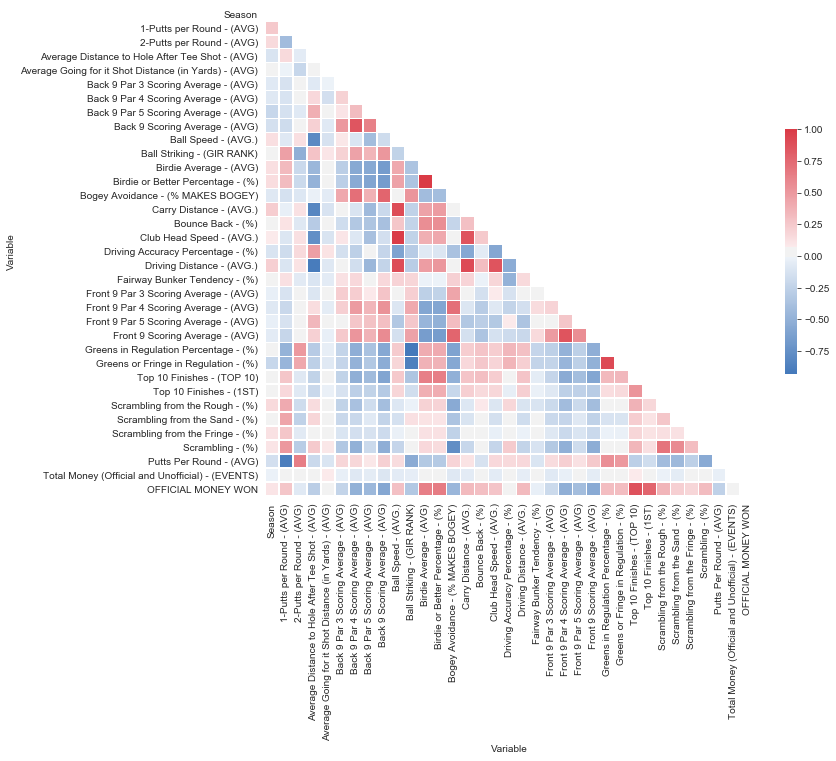

In [26]:
#check correlation matrix
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

In [27]:
#Create money won per tournament column by dividing official money won by number of events
df['MONEY WON PER TOURNAMENT'] = df['OFFICIAL MONEY WON']/df['Total Money (Official and Unofficial) - (EVENTS)']
df.head()

Variable     Player Name  Season  1-Putts per Round - (AVG)  \
1         Aaron Baddeley    2010                       7.28   
2         Aaron Baddeley    2011                       7.31   
3         Aaron Baddeley    2012                       7.96   
4         Aaron Baddeley    2013                       8.17   
5         Aaron Baddeley    2014                       7.94   

Variable  2-Putts per Round - (AVG) Apex Height - (AVG.)  \
1                             10.13              100' 1"   
2                              9.48               94' 1"   
3                              9.39               97' 2"   
4                              9.09               92' 1"   
5                              9.51              101' 9"   

Variable Average Distance of Putts made - (AVG DIST.)  \
1                                               4' 5"   
2                                               4' 3"   
3                                               4' 2"   
4                                               4' 4"   
5                                               4' 5"   

Variable  Average Distance to Hole After Tee Shot - (AVG)  \
1                                                   166.1   
2                                                   168.4   
3                                                   169.4   
4                                                   179.8   
5                                                   176.5   

Variable  Average Going for it Shot Distance (in Yards) - (AVG)  \
1                                                     257.8       
2                                                     251.0       
3                                                     253.2       
4                                                     253.6       
5                                                     250.1       

Variable  Back 9 Par 3 Scoring Average - (AVG)  \
1                                         3.09   
2                                         3.12   
3                                         3.10   
4                                         3.11   
5                                         3.16   

Variable  Back 9 Par 4 Scoring Average - (AVG)  \
1                                         4.02   
2                                         4.01   
3                                         4.09   
4                                         4.15   
5                                         4.07   

Variable  Back 9 Par 5 Scoring Average - (AVG)  \
1                                         4.72   
2                                         4.70   
3                                         4.68   
4                                         4.60   
5                                         4.61   

Variable  Back 9 Scoring Average - (AVG)  Ball Speed - (AVG.)  \
1                                  35.51               177.01   
2                                  35.40               176.34   
3                                  35.92               176.75   
4                                  35.97               176.32   
5                                  35.65               174.49   

Variable  Ball Striking - (GIR RANK)  Birdie Average - (AVG)  \
1                              164.0                    3.76   
2                               97.0                    4.08   
3                              190.0                    3.51   
4                              178.0                    3.50   
5                              174.0                    3.54   

Variable  Birdie or Better Percentage - (%)  \
1                                     21.63   
2                                     23.09   
3                                     19.75   
4                                     20.20   
5                                     19.83   

Variable  Bogey Avoidance - (% MAKES BOGEY)  Carry Distance - (AVG.)  \
1                                     16.73                    286.6   
2                                     16.

In [28]:
df.head()

Variable     Player Name  Season  1-Putts per Round - (AVG)  \
1         Aaron Baddeley    2010                       7.28   
2         Aaron Baddeley    2011                       7.31   
3         Aaron Baddeley    2012                       7.96   
4         Aaron Baddeley    2013                       8.17   
5         Aaron Baddeley    2014                       7.94   

Variable  2-Putts per Round - (AVG) Apex Height - (AVG.)  \
1                             10.13              100' 1"   
2                              9.48               94' 1"   
3                              9.39               97' 2"   
4                              9.09               92' 1"   
5                              9.51              101' 9"   

Variable Average Distance of Putts made - (AVG DIST.)  \
1                                               4' 5"   
2                                               4' 3"   
3                                               4' 2"   
4                                               4' 4"   
5                                               4' 5"   

Variable  Average Distance to Hole After Tee Shot - (AVG)  \
1                                                   166.1   
2                                                   168.4   
3                                                   169.4   
4                                                   179.8   
5                                                   176.5   

Variable  Average Going for it Shot Distance (in Yards) - (AVG)  \
1                                                     257.8       
2                                                     251.0       
3                                                     253.2       
4                                                     253.6       
5                                                     250.1       

Variable  Back 9 Par 3 Scoring Average - (AVG)  \
1                                         3.09   
2                                         3.12   
3                                         3.10   
4                                         3.11   
5                                         3.16   

Variable  Back 9 Par 4 Scoring Average - (AVG)  \
1                                         4.02   
2                                         4.01   
3                                         4.09   
4                                         4.15   
5                                         4.07   

Variable  Back 9 Par 5 Scoring Average - (AVG)  \
1                                         4.72   
2                                         4.70   
3                                         4.68   
4                                         4.60   
5                                         4.61   

Variable  Back 9 Scoring Average - (AVG)  Ball Speed - (AVG.)  \
1                                  35.51               177.01   
2                                  35.40               176.34   
3                                  35.92               176.75   
4                                  35.97               176.32   
5                                  35.65               174.49   

Variable  Ball Striking - (GIR RANK)  Birdie Average - (AVG)  \
1                              164.0                    3.76   
2                               97.0                    4.08   
3                              190.0                    3.51   
4                              178.0                    3.50   
5                              174.0                    3.54   

Variable  Birdie or Better Percentage - (%)  \
1                                     21.63   
2                                     23.09   
3                                     19.75   
4                                     20.20   
5                                     19.83   

Variable  Bogey Avoidance - (% MAKES BOGEY)  Carry Distance - (AVG.)  \
1                                     16.73                    286.6   
2                                     16.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 11218
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Player Name                                            1678 non-null   object 
 1   Season                                                 1678 non-null   int64  
 2   1-Putts per Round - (AVG)                              1678 non-null   float64
 3   2-Putts per Round - (AVG)                              1678 non-null   float64
 4   Apex Height - (AVG.)                                   1678 non-null   object 
 5   Average Distance of Putts made - (AVG DIST.)           1678 non-null   object 
 6   Average Distance to Hole After Tee Shot - (AVG)        1678 non-null   float64
 7   Average Going for it Shot Distance (in Yards) - (AVG)  1678 non-null   float64
 8   Back 9 Par 3 Scoring Average - (AVG)           

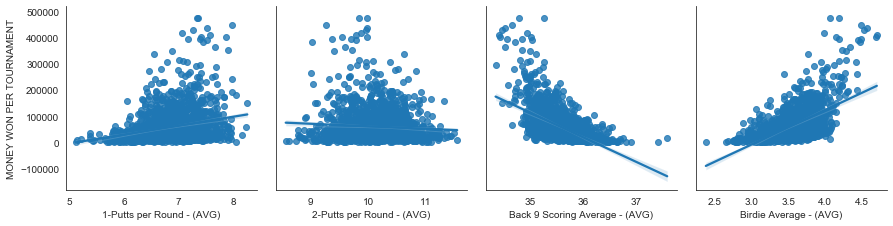

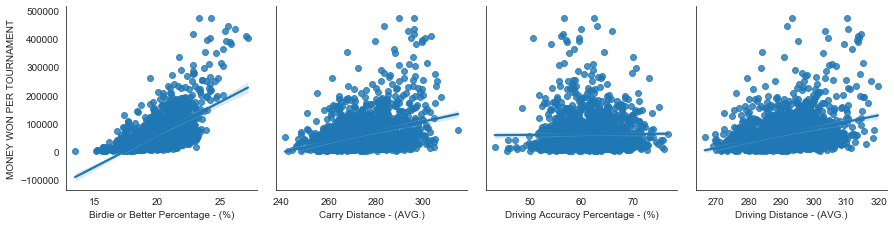

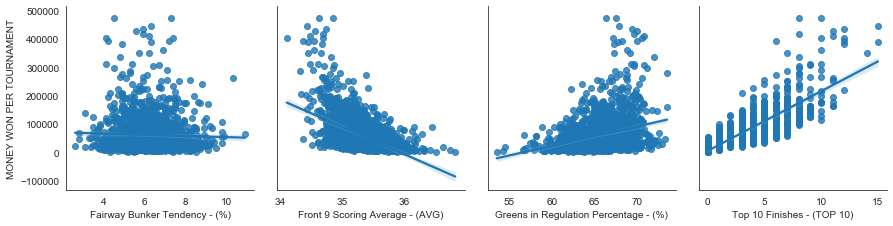

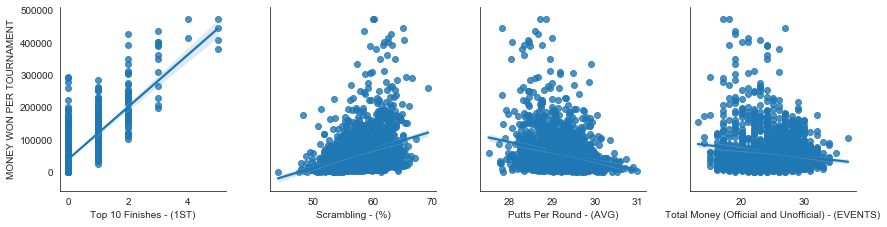

In [30]:
#create scatterplots with linear regression for key columns
features = ['1-Putts per Round - (AVG)', '2-Putts per Round - (AVG)', 'Back 9 Scoring Average - (AVG)',
            'Birdie Average - (AVG)', 'Birdie or Better Percentage - (%)',
            'Carry Distance - (AVG.)', 'Driving Accuracy Percentage - (%)', 'Driving Distance - (AVG.)',
            'Fairway Bunker Tendency - (%)', 'Front 9 Scoring Average - (AVG)','Greens in Regulation Percentage - (%)',
            'Top 10 Finishes - (TOP 10)', 'Top 10 Finishes - (1ST)', 'Scrambling - (%)',
            'Putts Per Round - (AVG)', 'Total Money (Official and Unofficial) - (EVENTS)' ]
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['MONEY WON PER TOURNAMENT'],x_vars=i, kind="reg", height=3)
    

In [88]:
#rename columns so that there are no spaces
df = df.rename(columns = {"1-Putts per Round - (AVG)":"1_putts_per_rd"})
df = df.rename(columns = {"2-Putts per Round - (AVG)":"2_putts_per_rd"})
df = df.rename(columns = {"Average Distance of Putts made - (AVG DIST.)":"avg_dist_putts_made"})
df = df.rename(columns = {"Average Distance to Hole After Tee Shot - (AVG)":"avg_dist_to_hole_2nd_shot"})
df = df.rename(columns = {"Back 9 Par 3 Scoring Average - (AVG)":"back_9_par_3_avg"})
df = df.rename(columns = {"Back 9 Par 4 Scoring Average - (AVG)":"back_9_par_4_avg"})
df = df.rename(columns = {"Back 9 Par 5 Scoring Average - (AVG)":"back_9_par_5_avg"})
df = df.rename(columns = {"Back 9 Scoring Average - (AVG)":"back_9_score_avg"})
df = df.rename(columns = {"Ball Speed - (AVG.)":"ball_speed"})
df = df.rename(columns = {"Ball Striking - (GIR RANK)":"GIR_rank"})
df = df.rename(columns = {"Birdie Average - (AVG)":"birdie_avg"})
df = df.rename(columns = {"Birdie or Better Percentage - (%)":"birdie_or_better_pct"})
df = df.rename(columns = {"Bogey Avoidance - (% MAKES BOGEY)":"bogey_pct"})
df = df.rename(columns = {"Carry Distance - (AVG.)":"carry_distance"})
df = df.rename(columns = {"Bounce Back - (%)":"bounce_back_pct"})
df = df.rename(columns = {"Driving Accuracy Percentage - (%)":"driving_accuracy_pct"})
df = df.rename(columns = {"Driving Distance - (AVG.)":"driving_distance_avg"})
df = df.rename(columns = {"Fairway Bunker Tendency - (%)":"fairway_bunker_pct"})
df = df.rename(columns = {"Front 9 Par 3 Scoring Average - (AVG)":"front_9_par_3_avg"})
df = df.rename(columns = {"Front 9 Par 4 Scoring Average - (AVG)":"front_9_par_4_avg"})
df = df.rename(columns = {"Front 9 Par 5 Scoring Average - (AVG)":"front_9_par_5_avg"})
df = df.rename(columns = {"Front 9 Scoring Average - (AVG)":"front_9_score_avg"})
df = df.rename(columns = {"Greens in Regulation Percentage - (%)":"GIR_pct"})
df = df.rename(columns = {"Top 10 Finishes - (TOP 10)":"top_10_finishes"})
df = df.rename(columns = {"Top 10 Finishes - (1ST)":"1st_place_finishes"})
df = df.rename(columns = {"Scrambling from the Rough - (%)":"rough_scrambling_pct"})
df = df.rename(columns = {"Scrambling from the Sand - (%)":"sand_scrambling_pct"})
df = df.rename(columns = {"Scrambling from the Fringe - (%)":"fringe_scrambling_pct"})
df = df.rename(columns = {"Scrambling - (%)":"scrambling_pct"})
df = df.rename(columns = {"Putts Per Round - (AVG)":"putts_per_round_avg"})
df = df.rename(columns = {"Total Money (Official and Unofficial) - (EVENTS)":"events"})
df = df.rename(columns = {"MONEY WON PER TOURNAMENT":"money_per_tourney"})

In [32]:
#check correlations between columns before making multiple linear regression model
df.corr()

Variable                                              Season  1_putts_per_rd  \
Variable                                                                       
Season                                              1.000000        0.252697   
1_putts_per_rd                                      0.252697        1.000000   
2_putts_per_rd                                      0.163134       -0.413715   
avg_dist_to_hole_2nd_shot                          -0.110574        0.159838   
Average Going for it Shot Distance (in Yards) -...  0.039955       -0.002813   
back_9_par_3_avg                                   -0.070215       -0.127559   
back_9_par_4_avg                                   -0.082088       -0.122877   
back_9_par_5_avg                                   -0.213060       -0.136948   
back_9_score_avg                                   -0.140662       -0.173853   
ball_speed                                          0.139313       -0.078053   
GIR_rank                                            0.003472        0.462869   
birdie_avg                                          0.140720        0.326260   
birdie_or_better_pct                                0.145021        0.315765   
bogey_pct                                          -0.084985       -0.132840   
Carry Distance - (AVG.)                             0.229977       -0.026316   
bounce_back_pct                                     0.056228        0.115734   
Club Head Speed - (AVG.)                            0.074462       -0.097751   
driving_accuracy_pct                               -0.111042       -0.170901   
driving_distance_avg                                0.221102       -0.106121   
fairway_bunker_pct                                  0.055996        0.132839   
front_9_par_3_avg                                  -0.025620       -0.121261   
front_9_par_4_avg                                  -0.078182       -0.199807   
front_9_par_5_avg                                  -0.031122       -0.127310   
front_9_score_avg                                  -0.060849       -0.217202   
GIR_pct                                            -0.000044       -0.483574   
Greens or Fringe in Regulation - (%)               -0.206726       -0.464532   
top_10_finishes                                     0.024752        0.263994   
1st_place_finishes                                  0.017836        0.169169   
rough_scrambling_pct                                0.158284        0.411123   
sand_scrambling_pct                                 0.045565        0.436906   
fringe_scrambling_pct                               0.122554        0.261898   
scrambling_pct                                      0.107181        0.504207   
putts_per_round_avg                                -0.145524       -0.880145   
events                                             -0.013216        0.019237   
OFFICIAL MONEY WON                                  0.108193        0.267757   
money_per_tourney                                   0.106215        0.255540   

Variable                                            2_putts_per_rd  \
Variable                                                             
Season                                                    0.163134   
1_putts_per_rd                                           -0.413715   
2_putts_per_rd                                            1.000000   
avg_dist_to_hole_2nd_shot                                -0.057249   
Average Going for it Shot Distance (in Yards) -...       -0.210797   
back_9_par_3_avg                                          0.061888   
back_9_par_4_avg                                          0.020510   
back_9_par_5_avg                                         -0.071342   
back_9_score_avg                                          0.001362   
ball_speed                                                0.138566   
GIR_rank                                                 -0.508220   
birdie_avg                                       

In [33]:
#update 1putts and 2putts per round column names so that they don't start with a number
df = df.rename(columns = {"1_putts_per_rd":"one_putts_per_rd"})
df = df.rename(columns = {"2_putts_per_rd":"two_putts_per_rd"})

In [34]:
#hypothesis test for rough vs sand scrambling percentage
#null hypothesis - rough scrambling pct = sand scrambling pct
#alt hypothesis - roughscrambling pct =/ sand scrambling pct
stats.ttest_ind(df['rough_scrambling_pct'], df['sand_scrambling_pct'])

Ttest_indResult(statistic=20.133488060849025, pvalue=3.352942090383973e-85)

In [35]:
t_crit = np.round(stats.t.ppf(1 - .05, df = (1678+1678-2)), 3)
t_crit

1.645

In [36]:
df['rough_scrambling_pct'].mean()

55.8669010727056

In [37]:
df['sand_scrambling_pct'].mean()

51.53558402860548

In [38]:
# Can reject the null hypothesis that Scrambling from the Rough % = Scrambling from the Sand %

In [91]:
#create multiple linear regression model (#1)
ols('money_per_tourney~ball_speed+scrambling_pct+GIR_rank+carry_distance+bogey_pct+birdie_or_better_pct+bounce_back_pct+putts_per_round_avg+scrambling_pct+events+driving_accuracy_pct+driving_distance_avg',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      money_per_tourney   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     154.0
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          2.05e-244
Time:                        18:54:53   Log-Likelihood:                -20304.
No. Observations:                1678   AIC:                         4.063e+04
Df Residuals:                    1666   BIC:                         4.070e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.112e+05   1.83e+05     -0.608      0.543    -4.7e+05    2.48e+05
ball_speed             933.6714    487.744      1.914      0.056     -22.985    1890.328
scrambling_pct        3087.4965    795.034      3.883      0.000    1528.126    4646.867
GIR_rank              -226.2287     48.098     -4.703      0.000    -320.568    -131.890
carry_distance         687.1779    259.103      2.652      0.008     178.976    1195.379
bogey_pct              139.0044   1676.951      0.083      0.934   -3150.148    3428.157
birdie_or_better_pct  1.592e+04   1311.857     12.139      0.000    1.34e+04    1.85e+04
bounce_back_pct      -1757.3262    428.147     -4.104      0.000   -2597.089    -917.563
putts_per_round_avg  -2.232e+04   5067.354     -4.405      0.000   -3.23e+04   -1.24e+04
events               -2614.1439    277.184     -9.431      0.000   -3157.809   -2070.479
driving_accuracy_pct  1412.3505    347.326      4.066      0.000     731.109    2093.592
driving_distance_avg    39.0670    347.673      0.112      0.911    -642.856     720.990
==============================================================================
Omnibus:                      567.963   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2881.925
Skew:                           1.512   Prob(JB):                         0.00
Kurtosis:                       8.664   Cond. No.                     7.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
#check rmse
features=['ball_speed', 'scrambling_pct',
          'GIR_rank', 'putts_per_round_avg', 'events', 'carry_distance', 'driving_accuracy_pct', 'bogey_pct', 'bounce_back_pct', 'birdie_or_better_pct', 
          'driving_distance_avg']
df_features = df[features]
target = df['money_per_tourney']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=22,test_size=0.2)

In [95]:
#instantiate a linear regression object
lm = LinearRegression()
#fit the linear regression to the data
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 41477.438551757


In [96]:
y_pred = lm.predict(X_test)
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 51388.203250852595
Training:  41477 vs. Testing:  51388


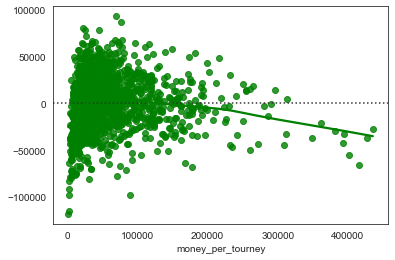

In [97]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

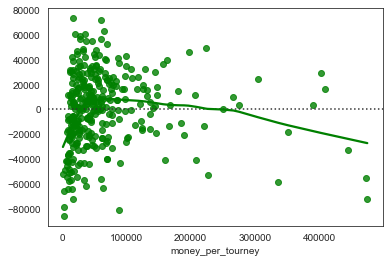

In [98]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

In [46]:
df['Season'] = df['Season'].astype(str)

In [47]:
df["Player Name (Season)"] = df["Player Name"]+ " " + "(" +df["Season"] +")"

In [48]:
df.head()

Variable     Player Name Season  one_putts_per_rd  two_putts_per_rd  \
1         Aaron Baddeley   2010              7.28             10.13   
2         Aaron Baddeley   2011              7.31              9.48   
3         Aaron Baddeley   2012              7.96              9.39   
4         Aaron Baddeley   2013              8.17              9.09   
5         Aaron Baddeley   2014              7.94              9.51   

Variable Apex Height - (AVG.) avg_dist_putts_made  avg_dist_to_hole_2nd_shot  \
1                     100' 1"               4' 5"                      166.1   
2                      94' 1"               4' 3"                      168.4   
3                      97' 2"               4' 2"                      169.4   
4                      92' 1"               4' 4"                      179.8   
5                     101' 9"               4' 5"                      176.5   

Variable  Average Going for it Shot Distance (in Yards) - (AVG)  \
1                                                     257.8       
2                                                     251.0       
3                                                     253.2       
4                                                     253.6       
5                                                     250.1       

Variable  back_9_par_3_avg  back_9_par_4_avg  back_9_par_5_avg  \
1                     3.09              4.02              4.72   
2                     3.12              4.01              4.70   
3                     3.10              4.09              4.68   
4                     3.11              4.15              4.60   
5                     3.16              4.07              4.61   

Variable  back_9_score_avg  ball_speed  GIR_rank  birdie_avg  \
1                    35.51      177.01     164.0        3.76   
2                    35.40      176.34      97.0        4.08   
3                    35.92      176.75     190.0        3.51   
4                    35.97      176.32     178.0        3.50   
5                    35.65      174.49     174.0        3.54   

Variable  birdie_or_better_pct  bogey_pct  Carry Distance - (AVG.)  \
1                        21.63      16.73                    286.6   
2                        23.09      16.38                    281.7   
3                        19.75      18.83                    288.8   
4                        20.20      19.87                    282.6   
5                        19.83      17.75                    283.3   

Variable  bounce_back_pct  Club Head Speed - (AVG.)  \
1                   27.72                    119.95   
2                   26.15                    119.14   
3                   18.97                    119.05   
4                   21.52                    118.89   
5                   20.36                    117.54   

Variable Distance from Center of Fairway - (AVG)  driving_accuracy_pct  \
1                                        25' 11"                 56.65   
2                                         26' 2"                 55.67   
3                                         28' 0"                 54.30   
4                                         27' 2"                 50.71   
5                                         29' 3"                 52.29   

Variable  driving_distance_avg  fairway_bunker_pct  front_9_par_3_avg  \
1                        298.9                 4.6               3.08   
2                        296.2                 6.0               3.08   
3                        292.0                 7.5               3.15   
4                        288.5                 6.6               3.11   
5                        293.8                 7.3               3.03   

Variable  front_9_par_4_avg  front_9_par_5_avg  front_9_score_avg  GIR_pct  \
1                      4.01               4.66              35.10    64.60   
2                      3.99               4.48              34.82    65.48   
3                      4.08          

In [49]:
top_10 = df.sort_values('money_per_tourney', ascending=False).head(10)[['Player Name (Season)', 'money_per_tourney']]
top_10

Variable   Player Name (Season)  money_per_tourney
10345        Tiger Woods (2013)      475191.000000
8854        Rory McIlroy (2012)      473408.882353
5326       Jordan Spieth (2015)      445572.740741
8856        Rory McIlroy (2014)      435794.473684
5598         Justin Rose (2018)      427930.368421
3111      Dustin Johnson (2017)      415818.714286
4560           Jason Day (2015)      408840.434783
3112      Dustin Johnson (2018)      402731.000000
4561           Jason Day (2016)      402255.550000
1527       Brooks Koepka (2018)      394113.722222

In [50]:
x = top_10['Player Name (Season)']

In [51]:
y = top_10['money_per_tourney']

<BarContainer object of 10 artists>

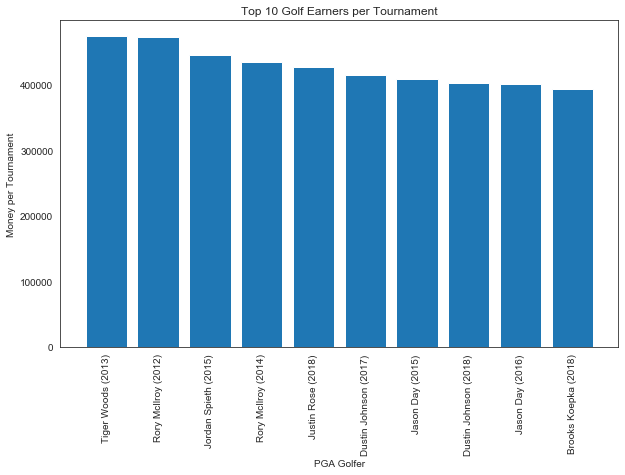

In [52]:
plt.figure(figsize = (10, 6))
plt.xlabel('PGA Golfer')
plt.ylabel('Money per Tournament')
plt.title('Top 10 Golf Earners per Tournament')
plt.xticks(rotation=90)
plt.bar(x, y)

In [53]:
bottom_10 = df.sort_values('money_per_tourney', ascending=False).tail(10)[['Player Name (Season)', 'money_per_tourney']]
bottom_10

Variable     Player Name (Season)  money_per_tourney
1319          Brendon Todd (2016)        2612.827586
9817      Stephen Gangluff (2012)        2552.260870
498         Andrew McLardy (2010)        2528.857143
3747            Greg Kraft (2010)        2371.636364
1161            Brad Faxon (2010)        2311.750000
6090         Kyle Thompson (2012)        2066.363636
533             Andrew Yun (2018)        1889.363636
6095         Kyle Thompson (2018)        1130.818182
8648        Robert Allenby (2016)        1052.958333
9939       Steven Bowditch (2017)         912.962963

In [56]:
x = bottom_10['Player Name (Season)']

In [57]:
y = bottom_10['money_per_tourney']

<BarContainer object of 10 artists>

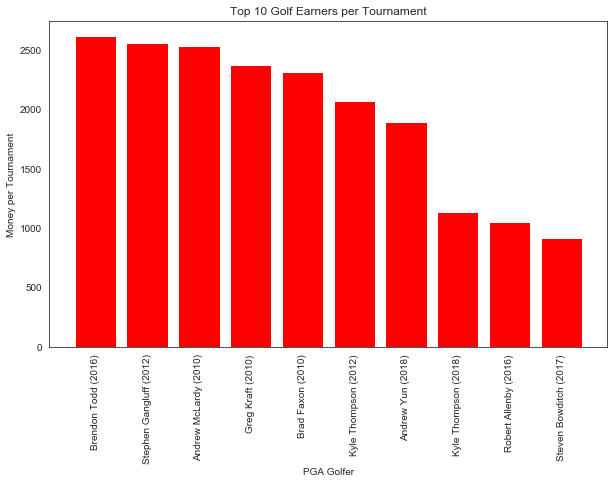

In [87]:
plt.figure(figsize = (10, 6))
plt.xlabel('PGA Golfer')
plt.ylabel('Money per Tournament')
plt.title('Top 10 Golf Earners per Tournament')
plt.xticks(rotation=90)
plt.bar(x, y, color='red')

